In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import style
import matplotlib.pyplot as plt
style.use('Solarize_Light2')

In [2]:
data = {
    'version': ['1996 Japan', '2005 Taiwan', '2010 Korea', '2013 Japan', '2015 Thailand'],
    'rating': [6.4, 8.2, 7.4, 8.1, 8.4],
    'rate user': [1641, 7938, 26337, 11644, 3734],
    'watcher': [2857, 12332, 37270, 18927, 7439]
}

version = pd.DataFrame(data=data)
version

,rate user,rating,version,watcher
0,1641,6.4,1996 Japan,2857
1,7938,8.2,2005 Taiwan,12332
2,26337,7.4,2010 Korea,37270
3,11644,8.1,2013 Japan,18927
4,3734,8.4,2015 Thailand,7439


In [6]:
version['feedback rate(%)'] = round(version['rate user'] / version['watcher'], 3) * 100
version['just watch'] = version['watcher'] - version['rate user']
version_plot = version.set_index('version')
del version_plot.index.name
version_plot

,rate user,rating,watcher,feedback rate(%),just watch
1996 Japan,1641,6.4,2857,57.4,1216
2005 Taiwan,7938,8.2,12332,64.4,4394
2010 Korea,26337,7.4,37270,70.7,10933
2013 Japan,11644,8.1,18927,61.5,7283
2015 Thailand,3734,8.4,7439,50.2,3705


Rectangle(xy=(0, -0.25), width=6.4, height=0.5, angle=0)
Rectangle(xy=(0, 0.75), width=8.2, height=0.5, angle=0)
Rectangle(xy=(0, 1.75), width=7.4, height=0.5, angle=0)
Rectangle(xy=(0, 2.75), width=8.1, height=0.5, angle=0)
Rectangle(xy=(0, 3.75), width=8.4, height=0.5, angle=0)


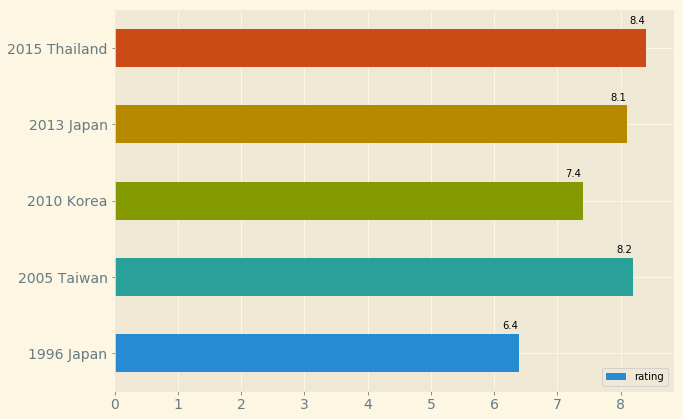

In [8]:
version_output = version_plot.plot(kind='barh', y='rating', fontsize=14, figsize=(10, 7))
for p in version_output.patches:
    print(p)
    version_output.annotate(p.get_width(),
                            (p.get_x() + p.get_width() - 0.27, p.get_y() + p.get_height() + 0.07))

fig = version_output.get_figure()
fig.savefig("../../images/version_rate.png", bbox_inches="tight")

Rectangle(xy=(1641, -0.25), width=1216, height=0.5, angle=0)
Rectangle(xy=(7938, 0.75), width=4394, height=0.5, angle=0)
Rectangle(xy=(26337, 1.75), width=10933, height=0.5, angle=0)
Rectangle(xy=(11644, 2.75), width=7283, height=0.5, angle=0)
Rectangle(xy=(3734, 3.75), width=3705, height=0.5, angle=0)


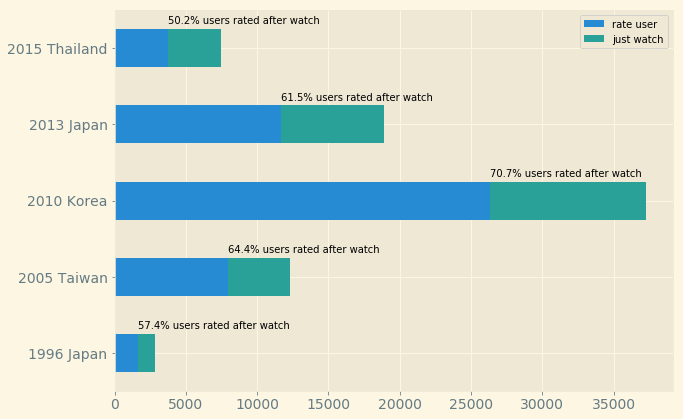

In [9]:
version_feedback = version_plot[['rate user', 'just watch']].plot(kind='barh', 
                                                                  stacked=True, 
                                                                  fontsize=14,
                                                                  figsize=(10, 7))
for i in range(len(version_feedback.patches)):
    if i > 4:
        b = version_feedback.patches[i]
        print(b)
        version_feedback.annotate(str(version_plot['feedback rate(%)'][i-5]) + '% users rated after watch', 
                                  (b.get_x(), b.get_y() + b.get_height() + 0.07))
        
fig = version_feedback.get_figure()
fig.savefig("../../images/feedback_rate.png", bbox_inches="tight")

In [3]:
korea_v = pd.read_csv('review_new.csv')
korea_v.head()

,name,review,vote,overall,story,cast,music,rewatch
0,Jeaniessi,"As with Boys Over Flowers, I am almost afraid ...",119,3.0,3.0,8.0,7.0,3.0
1,JohnGilbert,READ THIS IF YOU WANT A UNIQUE PERSPECTIVE OF ...,37,10.0,9.0,10.0,10.0,10.0
2,Rourou,1-The reason I watched this : As a huge fan of...,33,8.0,8.0,8.0,8.0,7.0
3,bubblefaerie,I wasn't intending to watch another version of...,14,8.0,8.0,8.5,4.5,3.5
4,SeRose,Funny how there's nothing really special about...,24,7.0,6.0,7.0,6.0,7.0


In [4]:
korea_r =korea_v.drop(columns=['name', 'review'])
korea_r.head()

,vote,overall,story,cast,music,rewatch
0,119,3.0,3.0,8.0,7.0,3.0
1,37,10.0,9.0,10.0,10.0,10.0
2,33,8.0,8.0,8.0,8.0,7.0
3,14,8.0,8.0,8.5,4.5,3.5
4,24,7.0,6.0,7.0,6.0,7.0


In [5]:
korea_review_mean = korea_r.mean()
korea_review_mean

vote       6.583333
overall    6.682292
story      6.515625
cast       7.093750
music      7.177083
rewatch    5.833333
dtype: float64

In [6]:
korea_vote_mean = korea_r.loc[korea_r['vote'] > 0].mean()
korea_vote_mean

vote       8.102564
overall    6.679487
story      6.493590
cast       7.185897
music      7.211538
rewatch    5.858974
dtype: float64

In [7]:
korea_max = korea_r.max()
korea_max

vote       119.0
overall     10.0
story       10.0
cast        10.0
music       10.0
rewatch     10.0
dtype: float64

In [15]:
korea_min = korea_r.min()

In [8]:
korea_max_vote_rate = korea_r.loc[korea_r['vote'] == korea_r['vote'].max()].T
korea_max_vote_rate

,0
vote,119.0
overall,3.0
story,3.0
cast,8.0
music,7.0
rewatch,3.0


In [9]:
output_data = pd.concat([korea_review_mean, korea_vote_mean], axis=1, keys=['avg_rating', 'avg_rating_with_vote'])
output_data

,avg_rating,avg_rating_with_vote
vote,6.583333,8.102564
overall,6.682292,6.679487
story,6.515625,6.493590
cast,7.093750,7.185897
music,7.177083,7.211538
rewatch,5.833333,5.858974


In [10]:
output_df = output_data.join(korea_max_vote_rate)
output_v = output_df.drop(['vote'])
output_v.columns = ['Average Rating', 'Average Rating Get Vote From Other User', 'Rating Get Most Vote']
output_v

,Average Rating,Average Rating Get Vote From Other User,Rating Get Most Vote
overall,6.682292,6.679487,3.0
story,6.515625,6.493590,3.0
cast,7.093750,7.185897,8.0
music,7.177083,7.211538,7.0
rewatch,5.833333,5.858974,3.0


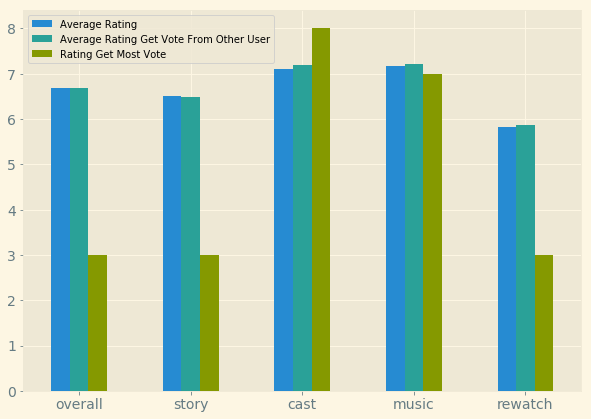

In [19]:
output_graph = output_v.plot(kind='bar', figsize=(10, 7), rot=0, fontsize=14)
fig = output_graph.get_figure()
fig.savefig("../../images/average_rating.png", bbox_inches="tight")

In [12]:
# compare rating with othet movie sites
compare_rate_data = {
    'version': ['1996 Japan', '2005 Taiwan', '2010 Korea', '2013 Japan', '2015 Thailand'],
    'mydramalist': [6.4, 8.2, 7.4, 8.1, 8.4],
    'douban': [8.4, 8.8, 6.5, 8.4, 7.4],
    'imdb': [0, 4.9, 7.2, 7.9, 0]
}
compare_rate_df = pd.DataFrame(compare_rate_data)
compare_rate_df

,douban,imdb,mydramalist,version
0,8.4,0.0,6.4,1996 Japan
1,8.8,4.9,8.2,2005 Taiwan
2,6.5,7.2,7.4,2010 Korea
3,8.4,7.9,8.1,2013 Japan
4,7.4,0.0,8.4,2015 Thailand


In [13]:
compare_watch_data = {
    'version': ['1996 Japan', '2005 Taiwan', '2010 Korea', '2013 Japan', '2015 Thailand'],
    'mydramalist rate user': [1641, 7938, 26337, 11644, 3734],
    'mydramalist watcher': [2857, 12332, 37270, 18927, 7439],
    'douban rate user': [28952, 73561, 14214, 93942, 4287],
    'douban watcher': [35468, 87435, 16653, 95869,  4643],
    'imdb rate user': [0, 761, 2071, 712, 0],
    'imdb watcher': [0, 761, 2071, 712, 0]
}
compare_watch_df = pd.DataFrame(compare_watch_data)
compare_watch_df

,douban rate user,douban watcher,imdb rate user,imdb watcher,mydramalist rate user,mydramalist watcher,version
0,28952,35468,0,0,1641,2857,1996 Japan
1,73561,87435,761,761,7938,12332,2005 Taiwan
2,14214,16653,2071,2071,26337,37270,2010 Korea
3,93942,95869,712,712,11644,18927,2013 Japan
4,4287,4643,0,0,3734,7439,2015 Thailand


In [14]:
compare_watch_df['total watcher'] = compare_watch_df['douban watcher'] + compare_watch_df['imdb watcher'] + compare_watch_df['mydramalist watcher']

compare_watch_df['total rate'] = compare_watch_df['douban rate user'] + compare_watch_df['imdb rate user'] + compare_watch_df['mydramalist rate user']

compare_watch_df

,douban rate user,douban watcher,imdb rate user,imdb watcher,mydramalist rate user,mydramalist watcher,version,total watcher,total rate
0,28952,35468,0,0,1641,2857,1996 Japan,38325,30593
1,73561,87435,761,761,7938,12332,2005 Taiwan,100528,82260
2,14214,16653,2071,2071,26337,37270,2010 Korea,55994,42622
3,93942,95869,712,712,11644,18927,2013 Japan,115508,106298
4,4287,4643,0,0,3734,7439,2015 Thailand,12082,8021


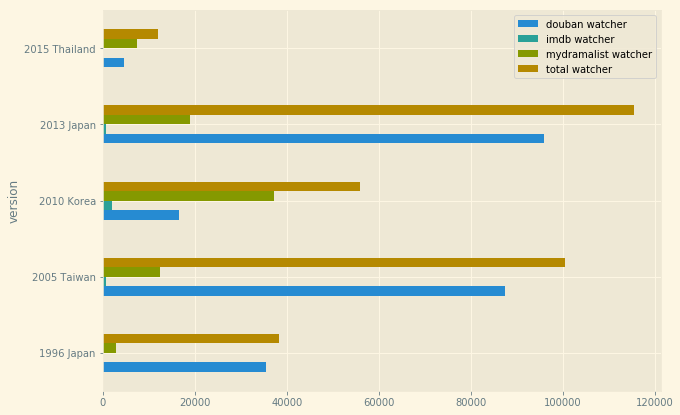

In [25]:
watcher_df = compare_watch_df[['version', 'douban watcher', 'imdb watcher', 'mydramalist watcher', 'total watcher']]
watcher_plot = watcher_df.set_index('version')
output_watcher_number = watcher_plot.plot(kind='barh', figsize=(10, 7))
fig = output_watcher_number.get_figure()
fig.savefig("../../images/watcher_number.png", bbox_inches="tight")

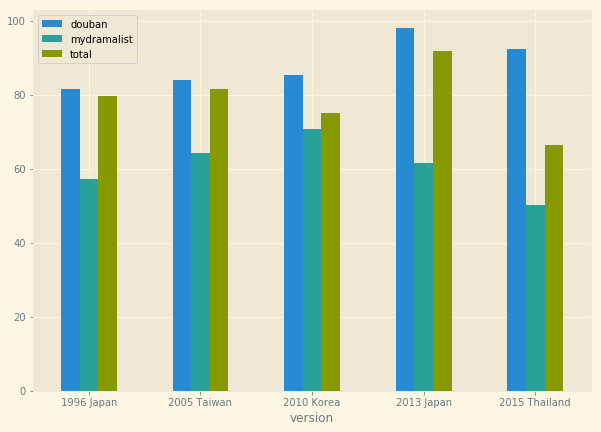

In [33]:
feedback_df = pd.DataFrame(
    data = {
        'version': compare_watch_df['version'],
        'douban': round(compare_watch_df['douban rate user'] / compare_watch_df['douban watcher'], 3) * 100,
        'mydramalist': round(compare_watch_df['mydramalist rate user'] / compare_watch_df['mydramalist watcher'], 3) * 100,
        'total': round((compare_watch_df['douban rate user'] + compare_watch_df['mydramalist rate user']) / (compare_watch_df['mydramalist watcher'] + compare_watch_df['douban watcher']), 3) * 100,
    }
) 
feedback_plot = feedback_df.set_index('version')
feedback_output = feedback_plot.plot(kind='bar', figsize=(10, 7), rot=0)
feedback_output.get_figure().savefig("../../images/feedback_sites.png", bbox_inches="tight")

In [15]:
average_rate_df = compare_watch_df.merge(compare_rate_df, on='version', how='outer')
average_rate_df

,douban rate user,douban watcher,imdb rate user,imdb watcher,mydramalist rate user,mydramalist watcher,version,total watcher,total rate,douban,imdb,mydramalist
0,28952,35468,0,0,1641,2857,1996 Japan,38325,30593,8.4,0.0,6.4
1,73561,87435,761,761,7938,12332,2005 Taiwan,100528,82260,8.8,4.9,8.2
2,14214,16653,2071,2071,26337,37270,2010 Korea,55994,42622,6.5,7.2,7.4
3,93942,95869,712,712,11644,18927,2013 Japan,115508,106298,8.4,7.9,8.1
4,4287,4643,0,0,3734,7439,2015 Thailand,12082,8021,7.4,0.0,8.4


In [16]:
average_rate_df['overall'] = (average_rate_df['douban rate user'] * average_rate_df['douban'] + average_rate_df['imdb rate user'] * average_rate_df['imdb'] + average_rate_df['mydramalist rate user'] * average_rate_df['mydramalist']) / average_rate_df['total rate'] 

In [17]:
average_rate_df

,douban rate user,douban watcher,imdb rate user,imdb watcher,mydramalist rate user,mydramalist watcher,version,total watcher,total rate,douban,imdb,mydramalist,overall
0,28952,35468,0,0,1641,2857,1996 Japan,38325,30593,8.4,0.0,6.4,8.292721
1,73561,87435,761,761,7938,12332,2005 Taiwan,100528,82260,8.8,4.9,8.2,8.706021
2,14214,16653,2071,2071,26337,37270,2010 Korea,55994,42622,6.5,7.2,7.4,7.090141
3,93942,95869,712,712,11644,18927,2013 Japan,115508,106298,8.4,7.9,8.1,8.363789
4,4287,4643,0,0,3734,7439,2015 Thailand,12082,8021,7.4,0.0,8.4,7.865528


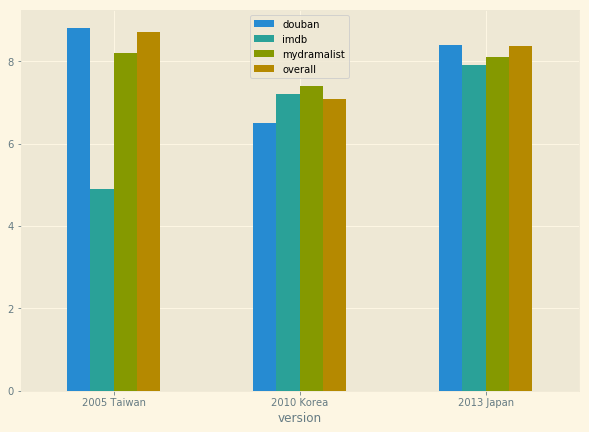

In [18]:
rate_graph = average_rate_df[['version', 'douban', 'imdb', 'mydramalist', 'overall']]
rate_graph = rate_graph.set_index('version')
output_rate_all = rate_graph.iloc[1:4].plot(kind='bar', figsize=(10,7), rot=0)
output_rate_all.get_figure().savefig("../../images/site_overall_rate.png", bbox_inches="tight")